#### Замечание
Ввод значений для удобства из файла\
Для ввода с клавиатуры использовать методы print_< current_task >(input).

In [1]:
import sys
from pathlib import Path
sys.path.append("../lib")
path_to_data=Path("../data/")
from input_output_func import write_to_file

####  A-Поиск кратчайшего пути между двумя узлами невзвешенного графа

Формат входных данных
На вход программе в первой строке подаются через пробел четыре числа: n, m, x, y. Число n (2 <= n <= 1000) - количество вершин в графе, m (1 <= m <= 20000) - количество ребер. x и y - начальная и конечная вершины соответственно (0 <= x,y < n). В следующих m строках задаются ребра, по два числа в каждой строке - номера соединенных вершин.

Формат выходных данных
Требутеся распечатать одно число - расстояние от вершины x до вершины y .



In [3]:
text="""8 10 5 2
4 7
5 1
0 1
3 1
0 2
3 5
3 4
0 4
4 6
5 4"""
path=path_to_data.joinpath("graph/bfs/A.txt")
write_to_file(text,path)

file A.txt exists


In [4]:
from get_graph import get_graph_from_edges
from collections import deque

def bfs_min_distance(graph,start,end):
    """Calc minimun distance between vertexes start and end in graph
    Return distance or None if weres no graph"""
    if start==end:
        return 0
    distance={start:0}
    queue=deque([start])
    while queue:
        v=queue.popleft()
        for u in graph[v]:
            if u not in distance:
                distance[u]=distance[v]+1
                if u==end: return distance[u]
                queue.append(u)
                
def print_distance(read_line):
    n,m,start,end=map(int,read_line().split())
    graph=get_graph_from_edges(read_line,n,m)
    res=bfs_min_distance(graph,start,end)
    if not res is None:
        print(res)
        
#print_distance(input)

path=path_to_data.joinpath("graph/bfs/A.txt")        
with path.open("r") as file:
    print_distance(file.readline)

3


#### B-Поиск расстояний от заданной вершины до всех остальных

Дан невзвешенный неориентированный связный граф. Вершины пронумерованы от 0. Трeбуется с помощью обхода в ширину найти расстояния от 0-й до всех остальных вершин.

Формат входных данных
На вход программе в первой строке подаются через пробел два числа: n (2 <= n <= 1000) — число вершин в графе и m (1 <= m <= 20000) — число рёбер. В следующих m строках задаются ребра: по два числа в каждой строке — номера соединённых вершин.

Формат выходных данных
Требуется распечатать n чисел, каждое на новой строке. В первой строке — расстояния от 0-й вершины до 0-й, во второй - от 0-й до 1-й, в третьей — от 0-й до 2-й и т.д.

In [5]:
text="""6 7
2 3
2 0
5 2
1 0
1 2
5 1
4 1"""
path=path_to_data.joinpath("graph/bfs/B.txt")
write_to_file(text,path)

file B.txt exists


In [6]:
from get_graph import get_graph_from_edges
from pathlib import Path
from collections import deque

def bfs_calc_distances(graph,start):
    """Calc distances between vertexes and start vertex in graph
    vertexes are numbers in range(0,n)
    Return distances, distance is None if were's no path"""
    n=len(graph.keys())
    distance=[0 if i==start else None for i in range(n)]
    queue=deque([start])
    while queue:
        v=queue.popleft()
        for u in graph[v]:
            if distance[u] is None:
                distance[u]=distance[v]+1
                queue.append(u)
    return distance

def print_distances(read_line,start):
    graph=get_graph_from_edges(read_line)
    res=bfs_calc_distances(graph,start)
    print(*res,sep="\n")
    
#print_distances(input,0)

path=path_to_data.joinpath("graph/bfs/B.txt")
with path.open("r") as file:
    print_distances(file.readline,2)

1
1
0
1
2
1


#### C-Поиск расстояния на прямоугольном поле

Дано прямоугольное поле размера n строк на m столбцов. Некоторые ячейки поля непроходимы. Требуется найти расстояние между двумя заданными ячейками.

Формат входных данных
В первой строке два числа — n и m (1 <= n,m <= 500) . Во второй — номер строки и столбца начальной ячейки, в третьей — номер строки и столбца конечной ячейки. В остальных n строках задано поле. Каждая строка поля содержит m символов, X задает непроходимую ячейку, «пробел» — проходимую.

Формат выходных данных
Вывести одно число — расстояние между указанными ячейками (ходить можно только по горизонтали или вертикали). Если пути между этими ячейками нет, выведите "INF" без кавычек.

In [7]:
text="""5 7
3 5
1 1
XXXXXXX
X X   X
X X X X
X   X X
XXXXXXX"""
path=path_to_data.joinpath("graph/bfs/C1.txt")
write_to_file(text,path)
text="""5 7
3 5
1 1
XXXXXXX
X X   X
X XXX X
X   X X
XXXXXXX"""
path=path_to_data.joinpath("graph/bfs/C2.txt")
write_to_file(text,path)

file C1.txt exists
file C2.txt exists


In [8]:
from collections import deque

def get_graph_from_field(read_line,n,m):
    """Gets graph as dict of adjacency lists from field size n*m,
    vertexes- cells of field (i,j),i-string,j-column,
    neighbour vertexes- neighbour cells wich can be passed
    reading from a stream by read_line method
    n strings: m cells, 'X'-not can be pass, ' ' - can be pass
    Returns graph"""
    graph={}
    for i in range(n):
        string=read_line()
        for j in range(m):
            if string[j]==' ':
                graph[(i,j)]=set()
                add_neighbours(graph,i,j)
    return graph

def add_neighbours(graph,i,j):
    possible_neighbours=((i-1,j),(i,j-1))
    for x,y in possible_neighbours:
        if (x,y) in graph:
            graph[(x,y)].add((i,j))
            graph[(i,j)].add((x,y))

def bfs_min_distance(graph,start,end):
    """Calc minimun distance between vertexes start and end in graph
    Return distance or None if weres no path"""
    if start==end:
        return 0
    if start not in graph or end not in graph: return
    distance={start:0}
    queue=deque([start])
    while queue:
        v=queue.popleft()
        for u in graph[v]:
            if u not in distance:
                distance[u]=distance[v]+1
                if u==end: return distance[u]
                queue.append(u)
                
def print_field_distance(read_line):
    n,m=map(int,read_line().split())
    start=tuple(map(int,read_line().split()))
    end=tuple(map(int,read_line().split()))
    graph=get_graph_from_field(read_line,n,m)
    distance=bfs_min_distance(graph,start,end)
    print(distance if not distance is None else "INF")
    
#print_field_distance(input)

path=path_to_data.joinpath("graph/bfs/C1.txt")        
with path.open("r") as file:
    print_field_distance(file.readline)

10


### D-Путь коня
На шахматной доске заданы координатами 2 различных точек. В первой из них находится конь, во вторую точку ему надо попасть. Выведите координаты клеток, через которые надо прочти коню, чтобы попасть во вторую точку. Путь должен быть кратчайшим, среди имеющихся.

Формат входных данных
Координаты двух клеток, каждая в отдельной строке. Координаты клеток задаются в виде буквы (от a до h) и цифры (от 1 до 8) без пробелов.

Формат выходных данных
Программа должна вывести путь коня, начинающийся и заканчивающийся в данных клетках и содержащий наименьшее число клеток.

In [10]:
from collections import deque

def get_graph_from_chessboad_knight():
    """Gets graph as dict of adjacency lists from chessboard,
    vertexes- cells ,
    neighbour vertexes- neighbour cells for knight move
    Returns graph"""
    letters='abcdefgh'
    numbers='12345678'
    moves=[(-2,-1),(-1,-2),(-1,2),(-2,1)]
    graph={}
    for i,l in enumerate(letters):
        for j,n in enumerate(numbers):
            graph[l+n]=set()
            add_neighbours(graph,moves,i,j,letters,numbers)
    return graph

def add_neighbours(graph,moves,i,j,letters,numbers):
    curr_cell=letters[i]+numbers[j]
    for k,l in moves:
        x=i+k;y=j+l;
        if 0<=x<8 and 0<=y<8:
            nb_cell=letters[x]+numbers[y];
            graph[nb_cell].add(curr_cell)
            graph[curr_cell].add(nb_cell)

def bfs_parents(graph,start,end):
    """Get minimun path between vertexes start and end in graph
    Return distance or None if weres no path"""
    if start not in graph or end not in graph: return
    parents={start:None}
    if start==end: return parents
    queue=deque([start])
    while queue:
        v=queue.popleft()
        for u in graph[v]:
            if u not in parents:
                parents[u]=v
                if u==end: return parents
                queue.append(u)
                
def find_shortest_path(parents,end):
    path=[end]
    parent=parents[end]
    while not parent is None:
        path.append(parent)
        parent=parents[parent]
    return path[::-1]
                
def print_knight_path(read_line):
    start=read_line().rstrip('\n')
    end=read_line().rstrip('\n')
    graph=get_graph_from_chessboad_knight()
    parents=bfs_parents(graph,start,end)
    path= find_shortest_path(parents,end) if not parents is None else None
    if not path is None:
        print(*path,sep='\n')
    
print_knight_path(input)


a1
h8
a1
c2
b4
c6
e7
g6
h8


#### E-Построить остовное дерево обходом в ширину
Дан невзвешенный неориентированный связный граф. Вершины пронумерованы от 0. Трeбуется с помощью обхода в ширину построить остовное дерево.

Формат входных данных
На вход программе в первой строке подаются через пробел два числа: n (2 <= n <= 1000) — число вершин в графе и m (1 <= m <= 20000) — число рёбер. В следующих m строках задаются ребра: по два числа в каждой строке — номера соединённых вершин.

Формат выходных данных
Требуется распечатать n-1 пару чисел, каждyю на новой строке. Каждая пара задаёт ребро в остовном дереве.

In [11]:
text="""6 7
2 3
2 0
5 2
1 0
1 2
5 1
4 1"""
path=path_to_data.joinpath("graph/bfs/E.txt")
write_to_file(text,path)

file E.txt is written


In [12]:
from collections import deque
def print_spanning_tree_bfs(graph):
    queue=deque([0])
    v=0
    used={v}
    #sp_tree=[]
    while queue:
        v=queue.popleft()
        for u in graph[v]:
            if not u in used:
                print(v,u)
                used.add(u)
                queue.append(u)
                
with path.open() as file:
    graph=get_graph_from_edges(file.readline)
print_spanning_tree_bfs(graph)

0 1
0 2
1 4
1 5
2 3


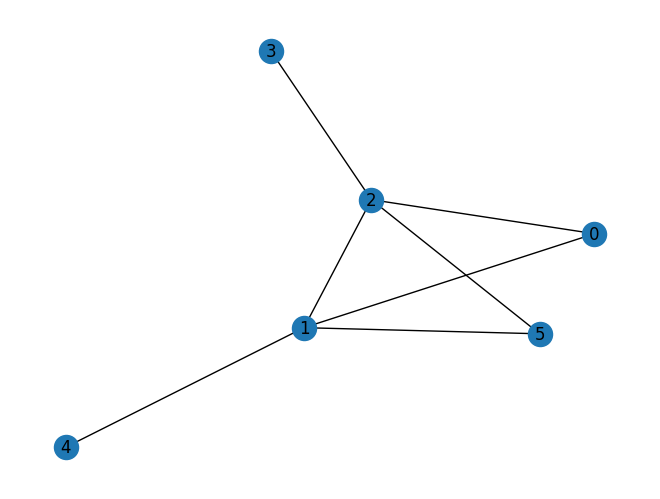

In [13]:
from matplotlib import pyplot as plt
import networkx as nx
G=nx.Graph(graph)
nx.draw(G,with_labels=True)
plt.show()

### F-Таблица

Дана таблица, состоящая из N строк и M столбцов. В каждой клетке таблицы записано одно из чисел: 0 или 1. Расстоянием между клетками (x1, y1) и (x2, y2) назовем сумму |x1-x2|+|y1-y2|. Вам необходимо построить таблицу, в клетке (i, j) которой будет записано минимальное расстояние между клеткой (i, j) начальной таблицы и клеткой, в которой записана 1. Гарантируется, что хотя бы одна 1 в таблице есть.

Формат входных данных
В первой строке вводятся два натуральных числа N и M, не превосходящих 500. Далее идут N строк по M чисел - элементы таблицы.

Формат выходных данных
Требуется вывести N строк по M чисел - элементы искомой таблицы.



In [3]:
text="""2 3
0 0 1
1 0 0"""
path=path_to_data.joinpath("graph/bfs/F.txt")
write_to_file(text,path)
text="""10 10
0 0 0 0 0 1 0 0 1 0
0 0 0 0 1 0 0 1 1 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 1 0 0 0 1 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 1 0 0
0 0 0 0 0 0 0 0 1 0
0 0 0 0 0 0 0 0 0 1
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0"""
path=path_to_data.joinpath("graph/bfs/F2.txt")
write_to_file(text,path)

file F.txt exists
file F2.txt exists


Вариант 1\
Для каждой клетки ij поиск расстояния до 1 обходом в ширину

In [4]:
from collections import deque

def get_table(read_line):
    """Read a table of 0 and 1 size n strings m columns from stream
    n,m in first line
    next n lines strings len m
    Returns set of ones coordinates(i,j)
    """
    n,m=map(int,read_line().split())
    table=set()
    for i in range(n):
        s=map(int,read_line().split())
        for j,x in enumerate(s):
            if x and j<m:
                table.add((i,j))
    return n,m,table
                
def get_neighbours(i,j,n,m):
    nb=set()
    possible_nb=((i-1,j),(i+1,j),(i,j-1),(i,j+1))
    for x,y in possible_nb:
        if 0<=x<n and 0<=y<m:
            nb.add((x,y))
    return nb
            
def bfs_min_distance(graph,table,i,j):
    """Calcs min distance from cell ij to one in table"""
    start=(i,j)
    if start in table: return 0
    queue=deque([start])
    distances={start:0}
    while queue:
        v=queue.popleft()
        for u in graph[v]:
            if u not in distances:
                distances[u]=distances[v]+1
                if u in table: return distances[u]
                queue.append(u)
        
def get_table_distances(n,m,table):
    graph={(i,j):get_neighbours(i,j,n,m) if i==0 or j==0 or i==n-1 or j==m-1
           else {(i-1,j),(i+1,j),(i,j-1),(i,j+1)}
           for i in range(n) for j in range(m) }
    min_distances=[[0 if (i,j) in table else m*n for j in range(m)] for i in range(n)]
    for i in range(n):
        #s=[None for j in range(m)]
        for j in range(m):
            if (i,j) not in table:
                min_distances[i][j]=bfs_min_distance(graph,table,i,j)
    return min_distances
        #print(*s)
        
with path.open('r') as file:
    n,m,table=get_table(file.readline)
#n,m,table=get_table(input)
min_distances=get_table_distances(n,m,table)
for i in range(n):
    print(*min_distances[i])

5 4 3 2 1 0 1 1 0 1
4 3 2 1 0 1 1 0 0 1
5 4 3 2 1 2 2 1 1 2
4 3 2 1 0 1 2 1 0 1
5 4 3 2 1 2 2 1 1 2
6 5 4 3 2 2 1 0 1 2
7 6 5 4 3 3 2 1 0 1
8 7 6 5 4 4 3 2 1 0
9 8 7 6 5 5 4 3 2 1
10 9 8 7 6 6 5 4 3 2


Версия 2\
Для каждой клетки ij находим минимальный путь до 1, для всех клеток пути также записываем расстояния (потом не персчитываем)

In [5]:
def bfs_min_distances_on_path(graph,table,used,min_distances,i,j):
    """Calcs min distances on min path from cell ij to one in table"""
    start=(i,j)
    queue=deque([start])
    distances={start:0}
    parents={start:None}
    end=None
    while queue and end not in table:
        v=queue.popleft()
        for u in graph[v]:
            if u not in distances:
                distances[u]=distances[v]+1
                parents[u]=v
                if u in table:
                    end=u
                    break
                queue.append(u)

    parent=parents[end]
    path_len=distances[end]
    while not parent is None :
        if parent not in used:
            used.add(parent)
            min_distances[parent[0]][parent[1]]=path_len-distances[parent]
        parent=parents[parent]
        
def get_table_distances_fast(n,m,table):
    graph={(i,j):get_neighbours(i,j,n,m) if i==0 or j==0 or i==n-1 or j==m-1
           else {(i-1,j),(i+1,j),(i,j-1),(i,j+1)}
           for i in range(n) for j in range(m) }
    min_distances=[[0 if (i,j) in table else m*n for j in range(m)] for i in range(n)]
    used=table.copy()
    for i in range(n):
        for j in range(m):
            if (i,j) not in used:
                bfs_min_distances_on_path(graph,table,used,min_distances,i,j)
    return min_distances

with path.open('r') as file:
    n,m,table=get_table(file.readline)
#n,m,table=get_table(input)
min_distances=get_table_distances_fast(n,m,table)
for i in range(n):
    print(*min_distances[i])

5 4 3 2 1 0 1 1 0 1
4 3 2 1 0 1 1 0 0 1
5 4 3 2 1 2 2 1 1 2
4 3 2 1 0 1 2 1 0 1
5 4 3 2 1 2 2 1 1 2
6 5 4 3 2 2 1 0 1 2
7 6 5 4 3 3 2 1 0 1
8 7 6 5 4 4 3 2 1 0
9 8 7 6 5 5 4 3 2 1
10 9 8 7 6 6 5 4 3 2


Версия 3 (для проверки тестов)\
Считаем методом перебора -  для каждой ij минимальное из расстояний до всех единиц 

In [6]:
def get_table_distances_bf(n,m,table):
    """Calcs table of minimum distances from cell (i,j)to ones by brute-force method
    for testing"""
    min_distances=[[0 if (i,j) in table else m*n for j in range(m)] for i in range(n)]
    for i in range(n):
        for j in range(m):
            for x,y in table:
                min_distances[i][j]=min(min_distances[i][j],abs(i-x)+abs(j-y))
    return min_distances
        
with path.open('r') as file:
    n,m,table=get_table(file.readline)
get_table_distances_bf(n,m,table)

[[5, 4, 3, 2, 1, 0, 1, 1, 0, 1],
 [4, 3, 2, 1, 0, 1, 1, 0, 0, 1],
 [5, 4, 3, 2, 1, 2, 2, 1, 1, 2],
 [4, 3, 2, 1, 0, 1, 2, 1, 0, 1],
 [5, 4, 3, 2, 1, 2, 2, 1, 1, 2],
 [6, 5, 4, 3, 2, 2, 1, 0, 1, 2],
 [7, 6, 5, 4, 3, 3, 2, 1, 0, 1],
 [8, 7, 6, 5, 4, 4, 3, 2, 1, 0],
 [9, 8, 7, 6, 5, 5, 4, 3, 2, 1],
 [10, 9, 8, 7, 6, 6, 5, 4, 3, 2]]

In [9]:
import time
import random
def write_table_to_file(table,res,method,n,m):
    mname=method.__name__.replace("get_table_distances","gtd")
    name="graph/table_{}x{}fail{}{}{}.txt".format(n,m,res[0],res[1],mname)
    path_to_data=Path("../data")
    path=path_to_data.joinpath(name)
    with path.open('w') as file:
        file.write("{} {}\n".format(n,m))
        for i in range(n):
            s=[0 for j in range(m)]
            for j in range(m):
                if (i,j) in table:
                    s[j]=1
            file.write(" ".join(map(str,s))+"\n")

def compare_tables(min_distances,answer,n,m):
    for i in range(n):
        for j in range(m):
            if min_distances[i][j]!=answer[i][j]:
                return i,j
            
def test_min_distances():
    methods=(get_table_distances_bf,get_table_distances,get_table_distances_fast)
    nm=[(random.randint(50,60),random.randint(40,60)),
        (random.randint(120,200),random.randint(20,30)),
       (random.randint(100,120),random.randint(200,300))]
    for n,m in nm:
        my_range=random.randrange(1,m*n)
        print("Test {} strings {} columns".format(n,m))
        answer=[[None for j in range(m)]for i in range(n)]
        table={(random.randrange(n),random.randrange(m))
               for i in range(1,my_range) }
        for method in methods:
            time_start=time.time()
            min_distances=method(n,m,table)
            time_end=time.time()
            #for i in range (n):
            #    print(*min_distances[i])
            if method==get_table_distances_bf:
                for i in range(n):
                    answer[i]=min_distances[i][:]
            else:
                print(method.__name__,"Time:{}".format(time_end-time_start),sep="\n")
                res=compare_tables(min_distances,answer,n,m)
                if res is None:
                    print("Ok")
                else:
                    print(answer[res[0]][res[1]],min_distances[res[0]][res[1]],res)
                    print("Fail in cell {}".format(res))
                    write_table_to_file(table,res,method.__name__,n,m)
        print("\n")

In [10]:
test_min_distances()

Test 57 strings 45 columns
get_table_distances
Time:1.1893482208251953
Ok
get_table_distances_fast
Time:0.9794285297393799
Ok


Test 179 strings 30 columns
get_table_distances
Time:0.011924266815185547
Ok
get_table_distances_fast
Time:0.010555505752563477
Ok


Test 107 strings 291 columns
get_table_distances
Time:0.09814000129699707
Ok
get_table_distances_fast
Time:0.19437789916992188
Ok


